# Silver sphere convergence

We run the single sphere LSPR problem for meshes of 512, 2048, 8192 and 32768 elements, and we present in this notebook a convergence plot.

Problem parameters:

* Metal    : Silver (Ag). (In water at room temeprature)
* Radius   : 10 nm
* Wavelength: 380

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.7972083599999999+8.504766399999999e-09j
* Silver dielectric: -3.3876520488233184+0.19220746083441781j

# Loading convergen test data 

In [1]:
import pickle

In [2]:
with open('data/convergence_test_silver_sphere.pickle', 'rb') as f:
    results = pickle.load(f)

In [3]:
print(results)

{'sphere_complex': {'Time': array([   4.3364222 ,   16.69899726,  112.12610769,  612.35676122]), 'analytical': 3622.11606847442, 'expected_rate': 4.0, 'Cext_0': array([ 4699.05812047,  3887.15684191,  3691.14338622,  3640.92778344]), 'iterations': array([ 14.,  20.,  25.,  31.]), 'error': array([ 0.297324  ,  0.07317291,  0.01905718,  0.00519357]), 'N': array([   512.,   2048.,   8192.,  32768.])}}


In [4]:
N = results['sphere_complex']['N']
error = results['sphere_complex']['error']
asymp = N[-2]*error[-2]/N

In [5]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline


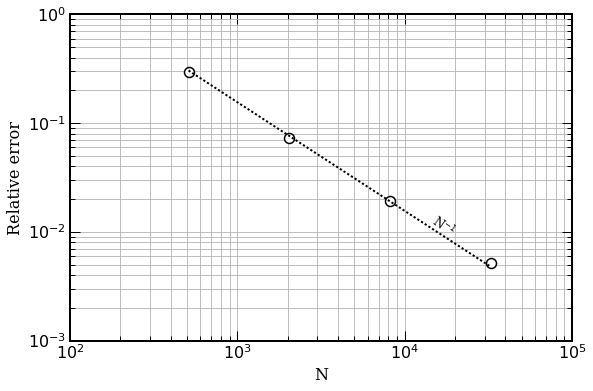

In [8]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['axes.linewidth'] = 2

pyplot.figure(figsize=(9,6))

pyplot.loglog(N, error, ls='',marker='o', c='k', mew=1.5, mfc='w', ms=10, label='')
pyplot.loglog(N, asymp, c='k', marker='None', ls=':', lw=2, label=None)

loc = (3*N[-2]+N[-1])/4

tex_loc = numpy.array((loc,N[-1]*error[-1]/loc))

pyplot.text(tex_loc[0], tex_loc[1],r'N$^{-1}$',fontsize=12,rotation=-35,rotation_mode='anchor')
pyplot.xlabel('N')
pyplot.ylabel('Relative error')
pyplot.tick_params(axis='both', length=10, width=1, which='major', direction='in')
pyplot.tick_params(axis='both', length=5, width=1, which='minor', direction='in')
pyplot.ylim(1e-3,1)
pyplot.xlim(1e2,1e5)
pyplot.grid(True, which="both");